# Modelling of physical systems - assignment for lab04
## Author: Przemysław Maresz

## Advection-Diffusion Problem

The advection-diffusion equation describes the transport of a scalar quantity, such as heat, pollutants, or chemical concentrations, due to both advection (bulk movement of the medium) and diffusion (spreading due to molecular motion). It is given by:

$$
\frac{\partial \psi}{\partial t} + u \frac{\partial \psi}{\partial x} = D \frac{\partial^2 \psi}{\partial x^2}
$$

where:
- $ \psi(x,t) $ is the concentration at position $ x $ and time $ t $,
- $ u $ is the advection velocity (bulk transport),
- $ D $ is the diffusion coefficient.

This problem has many real-world applications, such as pollutant dispersion in air or water, heat conduction in moving fluids, and reactive transport in porous media.

In [27]:
import numpy as np
from matplotlib import pyplot
import math

In [28]:
class AnalyticSolution:
  def __init__(self, u, D):
    self.u = u
    self.D = D

  def __call__(self, x, t):
    return (
        np.exp(-(np.pi**2 * self.D + self.u**2 / (4 * self.D)) * t)
        * np.sin(np.pi * x)
        )

def F(psi_l, psi_r, C):
    return .5 * (C + abs(C)) * psi_l + \
           .5 * (C - abs(C)) * psi_r

class shift:
    def __init__(self, add, sub):
      self.add = add
      self.sub = sub

    def __radd__(self, o):
      return slice(o.start + self.add, o.stop + self.add)

    def __rsub__(self, o):
      return slice(o.start - self.sub, o.stop - self.sub)

In [29]:
u = 1.0
D = 0.1
L = 1.0
nx = 64
t_max = 0.2


x, dx = np.linspace(0, L, nx + 1, endpoint=True, retstep=True)
x = x[:-1] + dx / 2

nt = 500
dt = t_max / nt
C_adv = u * dt / dx
C_diff = D * dt / dx**2

psi_analytic_func = AnalyticSolution(u=u, D=D)

psi_initial_analytic = psi_analytic_func(x=x, t=0)
psi_final_analytic = psi_analytic_func(x=x, t=t_max)

In [30]:
psi_numerical = psi_analytic_func(x=x, t=0).copy()

i = slice(1, nx - 1)
one = shift(add=1, sub=1)


for n in range(nt):
    psi_n = psi_numerical.copy()

    advection_term = F(psi_n[i], psi_n[i+one], C_adv) - F(psi_n[i-one], psi_n[i], C_adv)
    diffusion_term = C_diff * (psi_n[i+one] - 2 * psi_n[i] + psi_n[i-one])

    psi_numerical[i] = psi_n[i] - advection_term + diffusion_term


psi_final_numerical = psi_numerical.copy()



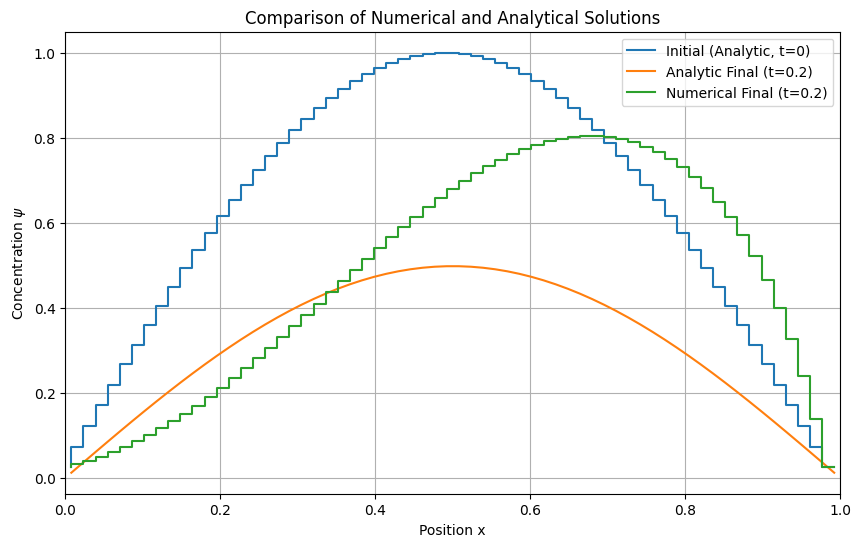

In [31]:
pyplot.figure(figsize=(10, 6))
pyplot.step(x, psi_initial_analytic, label='Initial (Analytic, t=0)')
pyplot.plot(x, psi_final_analytic, label=f'Analytic Final (t={t_max})')
pyplot.step(x, psi_final_numerical, label=f'Numerical Final (t={t_max})')

pyplot.title('Comparison of Numerical and Analytical Solutions')
pyplot.xlabel('Position x')
pyplot.ylabel('Concentration $\psi$')
pyplot.xlim(0, L)
pyplot.legend()
pyplot.grid(True)
pyplot.show()

## Conclusion
1. The **numerical solution shows noticeable diffusion** compared to the analytical solution. This is expected due to numerical diffusion, which is common in upwind schemes.
2. The **peak of the numerical solution is higher** than in the analytical solution. This suggests that the numerical method might be introducing slight artificial amplification.
3. The **numerical method captures advection**, but the solution appears to lag slightly behind the analytical curve. This is a common issue in explicit schemes with finite resolution.

Overall, while the numerical method provides a reasonable approximation, it exhibits some numerical diffusion and slight phase shifting.